# ALY6140 Capstone project

Aurthor: Zhe Cai

## 1. Data extraction

### 1.1 Data Download

The dataset I founded is from the Kaggle.com. Link is https://www.kaggle.com/sl6149/data-scientist-job-market-in-the-us. It collects information about 7,000 data scientist jobs around the U.S. on August 3rd, 2018.

In [1]:
import kaggle

dataset_name = "sl6149/data-scientist-job-market-in-the-us"
dataset_file_path = "./alldata.csv"

kaggle.api.authenticate()
kaggle.api.dataset_download_files(dataset_name, path=".", unzip=True)

### 1.2 Dataset describe

In [2]:
import numpy as np
import pandas as pd

raw_data = pd.read_csv(dataset_file_path)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     6953 non-null   object 
 1   company      6953 non-null   object 
 2   description  6953 non-null   object 
 3   reviews      5326 non-null   float64
 4   location     6953 non-null   object 
dtypes: float64(1), object(4)
memory usage: 272.2+ KB



There are 6964 observations in this dataset. 

Attributes:
- position : Position Name
- company : Company Name
- description: Job Description,
- reviews : Number of Reviews of the Company • location : Company Location

Here are three sample data.

In [3]:
raw_data.sample(3)

,position,company,description,reviews,location
2264,Project Scientist,UCLA David Geffen School of Medicine,A project scientist position is available in t...,16.0,"Los Angeles, CA 90095"
6804,Research Engineer,Oath Inc,"Oath, a subsidiary of Verizon, is a values-led...",5.0,"Sunnyvale, CA"
6761,Computer Vision Scientist/Engineer,Baidu USA,"Baidu USA, located in Silicon Valley, is looki...",NaN,"Sunnyvale, CA 94089"


### 1.3 Question intended to answer

As an MPS student majoring in analytics, we should first investigate all data science-related jobs and find out the jobs and fields that interest us. So at the end of this class, I would like to present some of my insights into the work of data analysts in the United States.


## 2. Data Cleaning

### 2.1 drop missing data and fill missing value as 0

In [4]:
raw_data.isna().sum()

position         11
company          11
description      11
reviews        1638
location         11
dtype: int64

In [5]:
data = raw_data.dropna(subset=["position"])
data["reviews"] = data["reviews"].fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6953 entries, 0 to 6963
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     6953 non-null   object 
 1   company      6953 non-null   object 
 2   description  6953 non-null   object 
 3   reviews      6953 non-null   float64
 4   location     6953 non-null   object 
dtypes: float64(1), object(4)
memory usage: 325.9+ KB


/Users/rocky/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### 2.2 clean location attribute

First we look at the Location attribute. Here are 10 sample of data.

In [6]:
data["location"].sample(10)

3166        Mountain View, CA
3992             New York, NY
1574              Chicago, IL
3032            Cambridge, MA
5397        Seattle, WA 98109
1284               Boston, MA
1247               Boston, MA
2786            Cambridge, MA
5164              Seattle, WA
3570    Jersey City, NJ 07310
Name: location, dtype: object

The Location attribute contains city, state and zip-code information. It is convenient for storing information in one columns, but it is hard for me to analyze, so I decide to separate it into three columns: City, State, ZipCode

In [7]:
data_with_zip = data.copy()
data_with_zip[["city", "state_zip"]] = data_with_zip["location"].str.split(
    ", ", expand=True
)
data_with_zip[["state", "zipcode"]] = data_with_zip["state_zip"].str.split(
    " ", n=1, expand=True
)
data_with_zip.drop(columns=["location", "state_zip"], inplace=True)
data_with_zip.sample(10)

,position,company,description,reviews,city,state,zipcode
3639,"VP, Business Intelligence",R/GA,"VP, Business Intelligence sets the strategy an...",15.0,New York,NY,None
6008,Assessment Manager,University of California San Francisco,The Assessment Manager is an integral member o...,269.0,San Francisco,CA,None
323,AI/ML Scientist,General Motors,PLEASE ONLY APPLY IF YOU DO NOT NEED SPONSORSH...,5941.0,Austin,TX,None
1637,Machine Learning Engineering Manager,ServiceNow,ServiceNow is changing the way people work. Wi...,90.0,Chicago,IL,None
3718,HR Manager,Gro Intelligence,About Us:\nGro Intelligence is a rapidly growi...,0.0,New York,NY,10001
6613,Senior Data Scientist,Quizlet,---------------------\nSenior Data Scientist\n...,0.0,San Francisco,CA,None
3646,Equity Manager Research Analyst,Citi,"Primary Location: United States,New York,New Y...",14088.0,New York,NY,10261
4400,Principal Software Engineer,Microsoft,Do you have a vision of the future of AI platf...,4618.0,Redmond,WA,98052
3745,Senior Research Scientist (Domestic),Guttmacher Institute,A Senior Research Scientist (SRS) is responsib...,0.0,New York,NY,10038
6780,Software Engineer,Amazon.com,Job Description\n\nAmazon Lab126 is an inventi...,25907.0,Sunnyvale,CA,None


In [8]:
data_with_zip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6953 entries, 0 to 6963
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     6953 non-null   object 
 1   company      6953 non-null   object 
 2   description  6953 non-null   object 
 3   reviews      6953 non-null   float64
 4   city         6953 non-null   object 
 5   state        6953 non-null   object 
 6   zipcode      2143 non-null   object 
dtypes: float64(1), object(6)
memory usage: 434.6+ KB


## 3. Data visualization

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = [10, 10]

## 3.1. TOP 20 job position being viewed

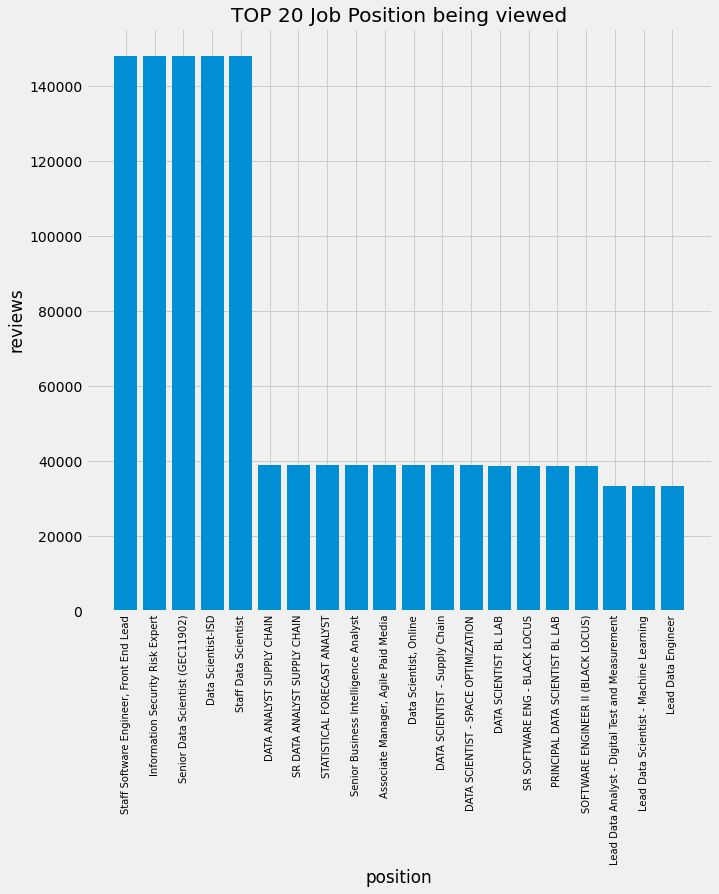

In [10]:
top_20_reviewes_job = data_with_zip.sort_values(by=["reviews"], ascending=False)[0:20]
plt.bar(top_20_reviewes_job["position"], top_20_reviewes_job["reviews"])
plt.xticks(top_20_reviewes_job["position"], rotation="vertical", size=10)
plt.title("TOP 20 Job Position being viewed")
plt.xlabel("position")
plt.ylabel("reviews")
plt.show()

From the chart, we can see that data scientist is a hot job. Huge people have reviewed the job description. 

### 3.2 TOP 10 company provide job position

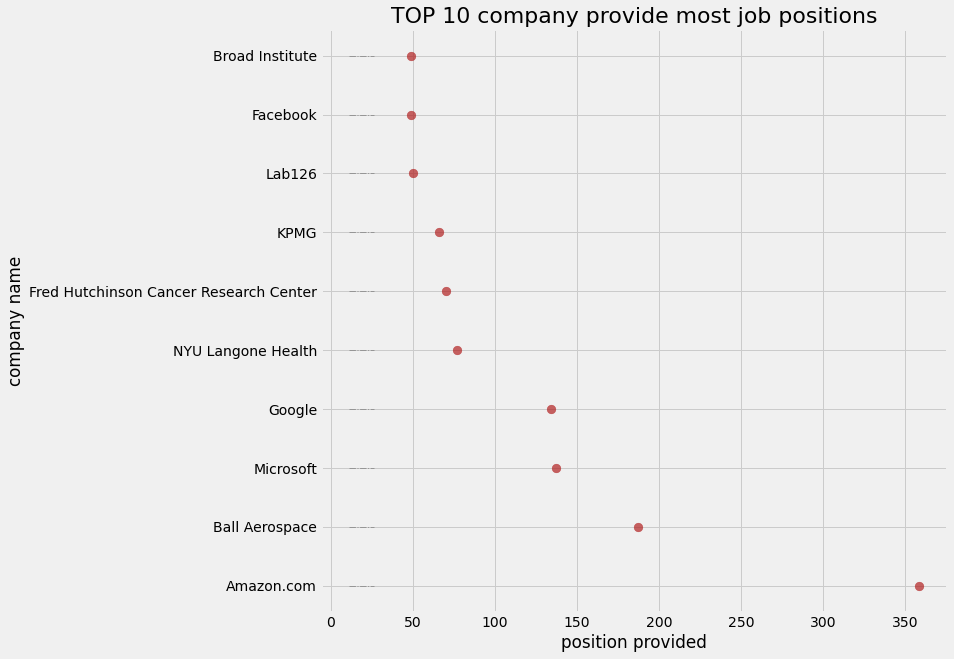

In [11]:
top_10_company = (
    data.groupby("company")
    .agg(np.size)
    .sort_values(by=["position"], ascending=False)[0:10]
)
plt.hlines(
    y=top_10_company.index,
    xmin=11,
    xmax=26,
    color="gray",
    alpha=0.7,
    linewidth=1,
    linestyles="dashdot",
)
plt.scatter(
    y=top_10_company.index,
    x=top_10_company["position"],
    s=75,
    color="firebrick",
    alpha=0.7,
)

plt.title("TOP 10 company provide most job positions", fontdict={"size": 22})
plt.xlabel("position provided")
plt.ylabel("company name")
plt.yticks(top_10_company.index)
plt.show()

From the chart, we could see that Amazon, Ball Aerospace, Google and Microsoft is looking for a lot of people who related to data science. It means that these companies are developing big data technology at a high rate and need a lot of relevant talent people. In other words, they are a more promising company. This also means you have a better chance of finding like-minded people in these companies. 

## Job distribution in the United States

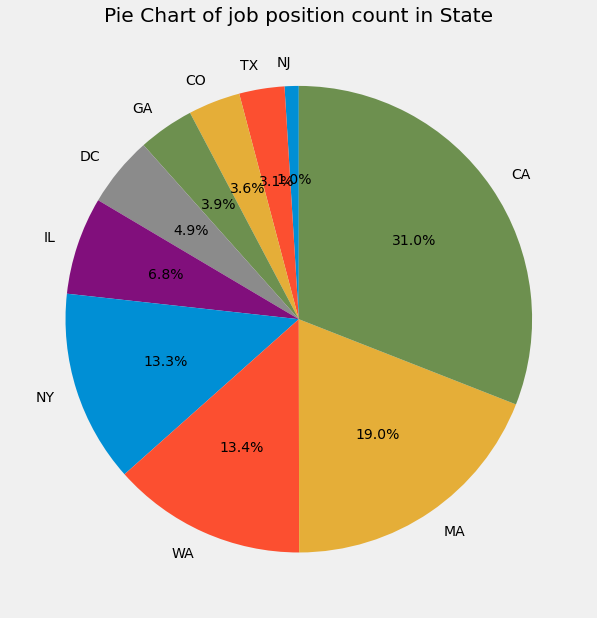

In [12]:
data_groupby_state = data_with_zip.groupby("state").size().sort_values()
data_groupby_state.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Pie Chart of job position count in State")
plt.ylabel("")
plt.show()

We can see that most data science jobs are located in California, Massachusetts, and Washington. The number of U.S. central regions is significantly less than that of eastern and western regions.

Text(0.5, 1.0, 'TOP 10 cities provided the most job positions')

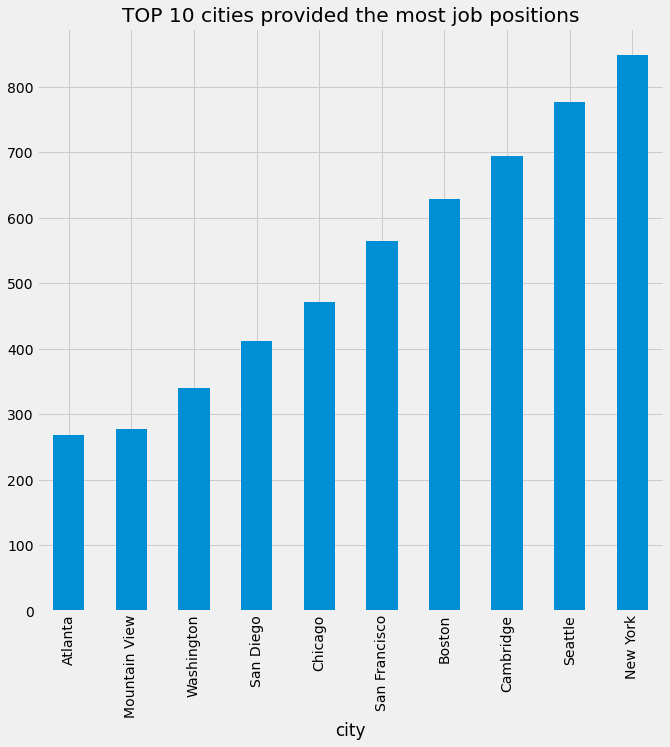

In [13]:
top_10_city = data_with_zip.groupby('city').size().sort_values().tail(10)
top_10_city.plot(kind='bar')
plt.title('TOP 10 cities provided the most job positions')

From the chart, we could see that New York, Seattle, Cambridge, Boston are the most viable cities. They provide a large number of data science-related positions. Maybe going to these cities can better find a job.

## 4. Descriptive/Predictive analytics

In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

relationship_pn = smf.ols('reviews ~ city', data = data_with_zip).fit()
relationship_pn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                reviews   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     9.479
Date:                Wed, 09 Dec 2020   Prob (F-statistic):          4.16e-116
Time:                        04:45:54   Log-Likelihood:                -71512.
No. Observations:                6953   AIC:                         1.432e+05
Df Residuals:                    6862   BIC:                         1.438e+05
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        558.4000   2256.050      0.248      0.805   -3864.156    4980.956
city[T.Allendale]               -558.4000   5526.171     -0.101      0.920   -1.14e+04    1.03e+04
city[T.Atlanta]                 2698.3584   2297.601      1.174      0.240   -1805.651    7202.368
city[T.Austin]                  2114.7362   2308.401      0.916      0.360   -2410.445    6639.918
city[T.Bedminster]              -474.4000   7482.470     -0.063      0.949   -1.51e+04    1.42e+04
city[T.Belmont]                  388.4000   3907.593      0.099      0.921   -7271.692    8048.492
city[T.Berkeley]                -104.0316   2787.218     -0.037      0.970   -5567.841    5359.778
city[T.Bloomfield]              -542.4000   7482.470     -0.072      0.942   -1.52e+04    1.41e+04
city[T.Boston]                   709.6143   2273.913      0.312      0.755   -3747.959    5167.187
city[T.Boulder]                 -381.2247   2300.552     -0.166      0.868   -4891.019    4128.570
city[T.Bronx]                   -434.6857   3515.800     -0.124      0.902   -7326.742    6457.370
city[T.Brooklyn]                -550.7571   2953.862     -0.186      0.852   -6341.243    5239.728
city[T.Burlingame]              -552.5250   3384.075     -0.163      0.870   -7186.359    6081.309
city[T.Cambridge]               2229.2297   2272.246      0.981      0.327   -2225.075    6683.535
city[T.Carlstadt]               -513.4000   7482.470     -0.069      0.945   -1.52e+04    1.42e+04
city[T.Cedar Park]              1766.6000   7482.470      0.236      0.813   -1.29e+04    1.64e+04
city[T.Chicago]                  671.2306   2279.874      0.294      0.768   -3798.028    5140.489
city[T.Daly City]               -558.4000   7482.470     -0.075      0.941   -1.52e+04    1.41e+04
city[T.East Hanover]            1651.6000   7482.470      0.221      0.825    -1.3e+04    1.63e+04
city[T.Emeryville]              -513.5053   2787.218     -0.184      0.854   -5977.315    4950.304
city[T.Fairfield]               -555.4000   7482.470     -0.074      0.941   -1.52e+04    1.41e+04
city[T.Florham Park]            -556.4000   7482.470     -0.074      0.941   -1.52e+04    1.41e+04
city[T.Fort Lee]                -532.4000   7482.470     -0.071      0.943   -1.52e+04    1.41e+04
city[T.Foster City]             -284.8286   2953.862     -0.096      0.923   -6075.314    5505.657
city[T.Fremont]                 -550.4000   7482.470     -0.074      0.941   -1.52e+04    1.41e+04
city[T.Hackensack]              -558.4000   7482.470     -0.075      0.941   -1.52e+04    1.41e+04
city[T.Harrison]                -364.4000   7482.470     -0.049      0.961    -1.5e+04    1.43e+04
city[T.Hayward]                 -276.8000   3190.536     -0.087      0.931   -6531.239    5977.639
city[T.Hoboken

Since R-squared is pretty close to 0, which is 0.111. We can't set a linear regression model for the reviews and the city name. 

## 5. Conclusions

If you are a novice data scientist and you're just looking for somewhere to get started, the graphs we created strongly support a couple of recommendations:

1. Data scientist job is hot. There are so many job positions we could choose. However, most of people are willing to be a data scientist.

2. Fast development of big data technology companies: Amazon, Ball Aerospace, Google and Microsoft. They are looking for a lot of people who related to data science. It means that these companies need a lot of relevant talent people. In other words, they are a more promising company. This also means you have a better chance of finding like-minded people in these companies. 

3. High viable cities: New York, Seattle, Cambridge, Boston. They provide a large number of data science-related positions. Maybe going to these cities can better find a job.

4. Learn Python. Python and R have both been around for decades, but from most job descriptions, python is pretty much always present. So learning an additional programming language may be beneficial for your future job.

## 6. Free for sharing

Github: 